In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [23]:
Data=pd.read_csv("./Data/en_lpor_explorer.csv")

In [24]:
Data.head()

,School,Gender,Age,Housing_Type,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Work,Father_Work,...,Is_Dating,Good_Family_Relationship,Free_Time_After_School,Time_with_Friends,Alcohol_Weekdays,Alcohol_Weekends,Health_Status,School_Absence,Grade_1st_Semester,Grade_2nd_Semester
0,Gabriel Pereira,Female,18,Urban,Above 3,Separated,Higher Education,Higher Education,Homemaker,Teacher,...,No,Good,Moderate,High,Very Low,Very Low,Fair,4,0,11
1,Gabriel Pereira,Female,17,Urban,Above 3,Living Together,Primary School,Primary School,Homemaker,other,...,No,Excellent,Moderate,Moderate,Very Low,Very Low,Fair,2,9,11
2,Gabriel Pereira,Female,15,Urban,Up to 3,Living Together,Primary School,Primary School,Homemaker,other,...,No,Good,Moderate,Low,Low,Moderate,Fair,6,12,13
3,Gabriel Pereira,Female,15,Urban,Above 3,Living Together,Higher Education,Lower Secondary School,Health,Services,...,Yes,Fair,Low,Low,Very Low,Very Low,Very Good,0,14,14
4,Gabriel Pereira,Female,16,Urban,Above 3,Living Together,High School,High School,other,other,...,No,Good,Moderate,Low,Very Low,Low,Very Good,0,11,13


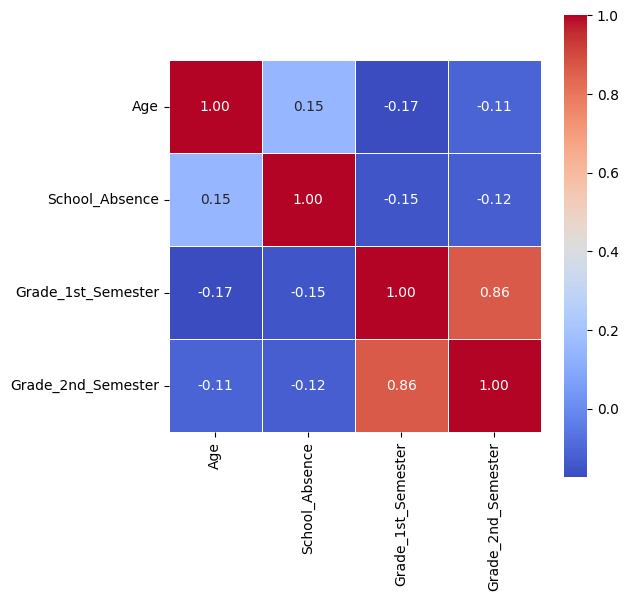

In [25]:
plt.figure(figsize=(6,6))
mat = Data.select_dtypes(include='number').corr()
sns.heatmap(mat, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=.5)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

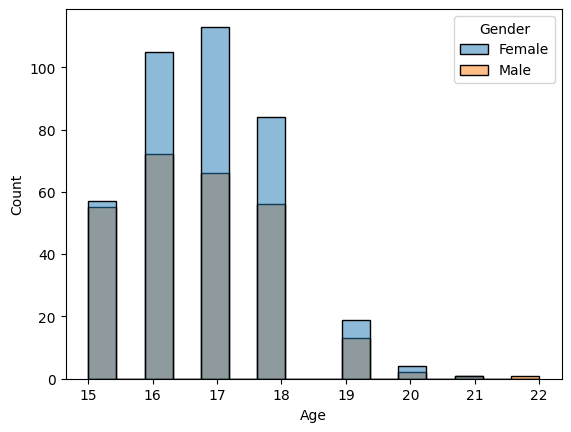

In [26]:
sns.histplot(Data,x="Age", hue="Gender")

In [27]:
Data

,School,Gender,Age,Housing_Type,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Work,Father_Work,...,Is_Dating,Good_Family_Relationship,Free_Time_After_School,Time_with_Friends,Alcohol_Weekdays,Alcohol_Weekends,Health_Status,School_Absence,Grade_1st_Semester,Grade_2nd_Semester
0,Gabriel Pereira,Female,18,Urban,Above 3,Separated,Higher Education,Higher Education,Homemaker,Teacher,...,No,Good,Moderate,High,Very Low,Very Low,Fair,4,0,11
1,Gabriel Pereira,Female,17,Urban,Above 3,Living Together,Primary School,Primary School,Homemaker,other,...,No,Excellent,Moderate,Moderate,Very Low,Very Low,Fair,2,9,11
2,Gabriel Pereira,Female,15,Urban,Up to 3,Living Together,Primary School,Primary School,Homemaker,other,...,No,Good,Moderate,Low,Low,Moderate,Fair,6,12,13
3,Gabriel Pereira,Female,15,Urban,Above 3,Living Together,Higher Education,Lower Secondary School,Health,Services,...,Yes,Fair,Low,Low,Very Low,Very Low,Very Good,0,14,14
4,Gabriel Pereira,Female,16,Urban,Above 3,Living Together,High School,High School,other,other,...,No,Good,Moderate,Low,Very Low,Low,Very Good,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,Mousinho da Silveira,Female,19,Rural,Above 3,Living Together,Lower Secondary School,High School,Services,other,...,No,Excellent,High,Low,Very Low,Low,Very Good,4,10,11
645,Mousinho da Silveira,Female,18,Urban,Up to 3,Living Together,High School,Primary School,Teacher,Services,...,No,Good,Moderate,High,Very Low,Very Low,Very Poor,4,15,15
646,Mousinho da Silveira,Female,18,Urban,Above 3,Living Together,Primary School,Primary School,other,other,...,No,Very Poor,Very Low,Very Low,Very Low,Very Low,Very Good,6,11,12
647,Mousinho da Silveira,Male,17,Urban,Up to 3,Living Together,High School,Primary School,Services,Services,...,No,Poor,High,Very High,Moderate,High,Poor,6,10,10


In [28]:
Data["Age"].max()

np.int64(22)

<Axes: xlabel='Family_Size', ylabel='count'>

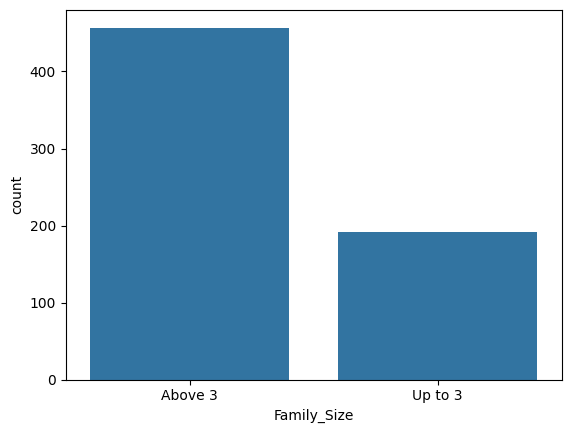

In [29]:
sns.countplot(Data,x="Family_Size")

In [30]:
above_3 = Data[Data["Family_Size"] == "Above 3"]
upto_3 = Data[Data["Family_Size"] == "Up to 3"]

In [31]:
# Count grades
above_3_counts = above_3["Grade_2nd_Semester"].value_counts().sort_index()
upto_3_counts = upto_3["Grade_2nd_Semester"].value_counts().sort_index()

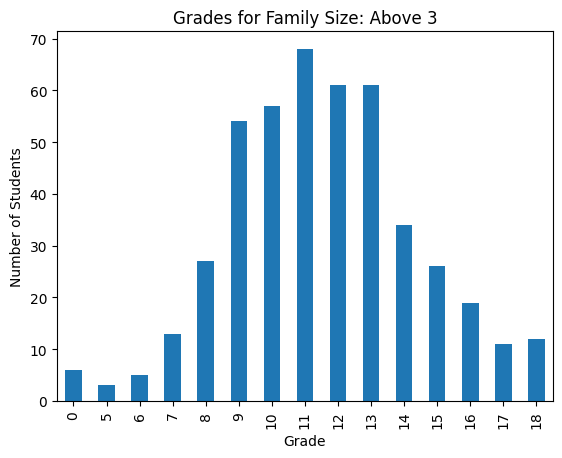

In [32]:
# Plot for Family Size: Above 3
plt.figure()
above_3_counts.plot(kind="bar")
plt.title("Grades for Family Size: Above 3")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.show()

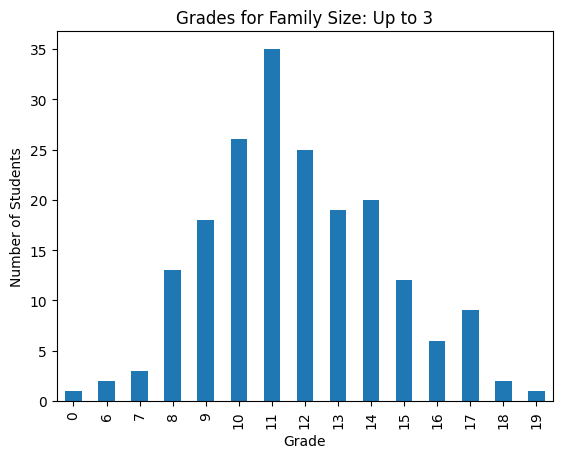

In [33]:
# Plot for Family Size: Up to 3
plt.figure()
upto_3_counts.plot(kind="bar")
plt.title("Grades for Family Size: Up to 3")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.show()

In [ ]:
sns.countplot(x=Data['Housing_Type'], hue='School_Absence' , data=Data,palette="Set2")
plt.title('Distribution of Housing Types')
plt.ylabel('Count')
plt.show()